In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

# mostrar todas as colunas
pd.set_option('display.max_columns', None)

# importando o arquivo
apps = pd.read_csv("/content/drive/MyDrive/FACULDADE/google play store/googleplaystore.csv")
reviews = pd.read_csv("/content/drive/MyDrive/FACULDADE/google play store/googleplaystore_user_reviews.csv")

# limpeza inicial
apps.dropna(subset=["App"], inplace=True)
reviews.dropna(subset=["App"], inplace=True)

# juntar: cada review vai herdar as colunas do app
df = reviews.merge(apps, on="App", how="inner")



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   App                     122662 non-null  object 
 1   Translated_Review       72605 non-null   object 
 2   Sentiment               72615 non-null   object 
 3   Sentiment_Polarity      72615 non-null   float64
 4   Sentiment_Subjectivity  72615 non-null   float64
 5   Category                122662 non-null  object 
 6   Rating                  122622 non-null  float64
 7   Reviews                 122662 non-null  object 
 8   Size                    122662 non-null  object 
 9   Installs                122662 non-null  object 
 10  Type                    122662 non-null  object 
 11  Price                   122662 non-null  object 
 12  Content Rating          122662 non-null  object 
 13  Genres                  122662 non-null  object 
 14  Last Updated        

In [ ]:
#COLUNAS DO DATASET

#googleplaystore_user_reviews.csv (Reviews dos usuários)

# App → Nome do aplicativo
# Translated_Review → Avaliação traduzida (texto do usuário) (EXCLUÍDA)
# Sentiment → Sentimento (positivo, negativo ou neutro)
# Sentiment_Polarity → Polaridade do sentimento (varia de -1 a 1)
# Sentiment_Subjectivity → Subjetividade do sentimento (0 = objetivo, 1 = subjetivo) (EXCLUÍDA)

#googleplaystore.csv (Dados dos aplicativos)

# App → Nome do aplicativo
# Category → Categoria do app (ex.: Jogos, Produtividade)
# Rating → Nota média do app (0 a 5)
# Reviews → Número de avaliações recebidas (contagem)
# Size → Tamanho do app (em MB, KB ou “Varies with device”)
# Installs → Número de instalações (ex.: 1,000+, 10,000,000+)
# Type → Tipo do app (Free = grátis, Paid = pago)
# Price → Preço do app (0 se grátis, valor em $ se pago)
# Content Rating → Classificação etária (ex.: Everyone, Teen, Mature 17+)
# Genres → Gênero/subcategoria (pode ter mais de um, ex.: Action;Adventure)
# Last Updated → Data da última atualização
# Current Ver → Versão atual do aplicativo
# Android Ver → Versão mínima do Android necessária

In [ ]:
df.shape

(122662, 17)

In [ ]:
# Lista de colunas a serem excluídas do dataset
colunas_para_excluir = [
    'Translated_Review',
    'Sentiment_Subjectivity'
]


# Remove as colunas indesejadas
df = df.drop(columns=colunas_para_excluir)

# Exibe as 10 primeiras linhas do dataframe
df.head(10)


,App,Sentiment,Sentiment_Polarity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,Positive,1.00,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,10 Best Foods for You,Positive,1.00,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2,10 Best Foods for You,Positive,0.25,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
3,10 Best Foods for You,Positive,0.25,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
4,10 Best Foods for You,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
5,10 Best Foods for You,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
6,10 Best Foods for You,Positive,0.40,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
7,10 Best Foods for You,Positive,0.40,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
8,10 Best Foods for You,Positive,1.00,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
9,10 Best Foods for You,Positive,1.00,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up


In [ ]:
# COLUNA DE CATEGORIAS
df['Category'].unique()

array(['HEALTH_AND_FITNESS', 'SHOPPING', 'MEDICAL', 'GAME',
       'PERSONALIZATION', 'DATING', 'TRAVEL_AND_LOCAL', 'COMMUNICATION',
       'SPORTS', 'ART_AND_DESIGN', 'LIFESTYLE', 'PRODUCTIVITY', 'FAMILY',
       'ENTERTAINMENT', 'PHOTOGRAPHY', 'FINANCE', 'NEWS_AND_MAGAZINES',
       'EDUCATION', 'BUSINESS', 'WEATHER', 'TOOLS', 'MAPS_AND_NAVIGATION',
       'BOOKS_AND_REFERENCE', 'HOUSE_AND_HOME', 'EVENTS', 'SOCIAL',
       'VIDEO_PLAYERS', 'FOOD_AND_DRINK', 'PARENTING',
       'AUTO_AND_VEHICLES', 'LIBRARIES_AND_DEMO', 'BEAUTY', 'COMICS'],
      dtype=object)

In [ ]:
#COLUNA DE RATING
df['Rating'].unique()

# Converte a coluna Rating para tipo numérico (float).
# Se houver algum valor inválido (ex: string), ele será transformado em NaN.
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Verifica o tipo da coluna após a conversão
df['Rating'].dtype


dtype('float64')

In [ ]:
# COLUNA DE REVIEWS
df['Reviews'].unique()

array(['2490', '48732', '23160', ..., '353799', '353800', '353813'],
      dtype=object)

In [ ]:
# Ajusta valores incorretos/estranhos na coluna Reviews
# Troca "0.0" por 0 (string → número)
df['Reviews'] = df['Reviews'].replace("0.0", 0)

# Troca "3.0M" por 3.000.000 (string → número)
df['Reviews'] = df['Reviews'].replace("3.0M", 3000000.0)

# Converte toda a coluna para tipo float
df['Reviews'] = df['Reviews'].astype(float)

# Verifica o tipo final
df['Reviews'].dtype


dtype('float64')

In [ ]:
#COLUNA SIZE
df['Size'].unique()

array(['3.8M', '20M', '26M', '10M', 'Varies with device', '15M', '8.1M',
       '32M', '25M', '7.4M', '37M', '21M', '14M', '4.3M', '52M', '67M',
       '11M', '68M', '2.9M', '19M', '6.3M', '35M', '91M', '45M', '29M',
       '72M', '4.6M', '9.1M', '9.8M', '9.7M', '22M', '1.6M', '6.1M',
       '24M', '6.9M', '8.5M', '23M', '39M', '1.5M', '3.3M', '6.8M', '86M',
       '55M', '5.9M', '7.3M', '9.5M', '17M', '2.1M', '5.6M', '63M',
       '4.1M', '42M', '62M', '28M', '16M', '57M', '97M', '46M', '58M',
       '9.6M', '36M', '5.7M', '7.5M', '13M', '292k', '3.5M', '2.3M',
       '7.6M', '92M', '12M', '6.4M', '232k', '624k', '50M', '27M', '2.8M',
       '38M', '53M', '5.2M', '49M', '3.4M', '3.0M', '66M', '9.3M', '65M',
       '85M', '9.4M', '78M', '5.3M', '61M', '8.0M', '34M', '7.8M', '5.1M',
       '76M', '44M', '95M', '5.0M', '80M', '33M', '18M', '4.9M', '2.7M',
       '2.4M', '2.6M', '8.4M', '40M', '4.5M', '51M', '6.6M', '41M', '74M',
       '1.8M', '1.9M', '59M', '6.2M', '3.6M', '5.8M', '3.2M

In [ ]:
# Substitui o texto "Varies with device" por NaN, já que não é um valor numérico
df['Size'] = df['Size'].replace("Varies with device", np.nan)

# Remove a letra "M" e troca por "000" → ex: "3.8M" vira "3.8000" (representando em kilobytes)
df['Size'] = df['Size'].str.replace("M", "000", regex=False)

# Remove o "k" → ex: "14k" vira "14"
df['Size'] = df['Size'].str.replace("k", "", regex=False)

# Corrige um caso específico que pode aparecer escrito como "1,000+"
df['Size'] = df['Size'].replace("1,000+", 1000)

# Converte a coluna inteira para float
df['Size'] = df['Size'].astype(float)

# Verifica o tipo final
df['Size'].dtype


dtype('float64')

In [ ]:
#COLUNA INSTALLS
df['Installs'].unique()

array(['500,000+', '10,000,000+', '1,000,000+', '100,000+', '50,000,000+',
       '10,000+', '100,000,000+', '1,000+', '5,000,000+', '50,000+',
       '5,000+', '500,000,000+', '1,000,000,000+'], dtype=object)

In [ ]:
# Remove as vírgulas dos números → ex: "500,000+" vira "500000+"
df['Installs'] = df['Installs'].str.replace(",", "", regex=False)

# Remove o sinal de "+" → ex: "500000+" vira "500000"
df['Installs'] = df['Installs'].str.replace("+", "", regex=False)

# Substitui valores inválidos como "Free" por NaN
df['Installs'] = df['Installs'].replace("Free", np.nan)

# Converte a coluna inteira para float
df['Installs'] = df['Installs'].astype(float)

# Verifica o tipo final
df['Installs'].dtype


dtype('float64')

In [ ]:
#COLUNA PRICE

df['Price'].unique()


array(['0', '$33.99', '$7.99', '$9.99', '$2.49', '$3.99', '$6.99',
       '$3.95', '$2.99', '$1.99', '$11.99', '$4.99', '$29.99', '$0.99'],
      dtype=object)

In [ ]:
# Substitui valores incorretos, como "Everyone", por NaN
df['Price'] = df['Price'].replace("Everyone", np.nan)

# Remove o símbolo "$" e converte para float
df['Price'] = df['Price'].str.replace("$", "", regex=False).astype(float)

# Verifica o tipo final da coluna
df['Price'].dtype


dtype('float64')

In [ ]:
#COLUNA LAST UPDATED
df['Last Updated'].unique()

array(['February 17, 2017', 'July 31, 2018', 'July 27, 2018',
       'August 3, 2018', 'May 22, 2018', 'August 2, 2018',
       'July 26, 2018', 'July 30, 2018', 'July 29, 2018', 'July 1, 2018',
       'June 26, 2018', 'May 13, 2018', 'July 4, 2018', 'March 8, 2017',
       'June 8, 2018', 'December 19, 2015', 'August 23, 2016',
       'July 11, 2018', 'August 1, 2018', 'December 4, 2016',
       'October 2, 2017', 'January 5, 2017', 'July 16, 2018',
       'August 6, 2018', 'June 22, 2018', 'June 6, 2018',
       'October 25, 2017', 'July 3, 2018', 'May 24, 2018', 'May 9, 2018',
       'July 28, 2018', 'July 17, 2018', 'December 8, 2017',
       'July 18, 2018', 'May 25, 2017', 'August 4, 2018', 'July 25, 2018',
       'March 15, 2018', 'December 1, 2017', 'April 11, 2018',
       'July 13, 2018', 'April 14, 2017', 'December 6, 2016',
       'April 26, 2018', 'June 27, 2018', 'June 14, 2018',
       'July 24, 2018', 'July 27, 2016', 'June 15, 2018',
       'April 13, 2018', 'September

In [ ]:
# Converte a coluna Last Updated para datetime
# Isso permite trabalhar com datas, extrair ano/mês/dia, ou fazer comparações temporais
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Mostra a coluna convertida
df['Last Updated']


,Last Updated
0,2017-02-17
1,2017-02-17
2,2017-02-17
3,2017-02-17
4,2017-02-17
...,...
122657,2018-08-01
122658,2018-08-01
122659,2018-08-01
122660,2018-08-01


In [ ]:
# Encontra os índices das linhas com ao menos um valor ausente (NaN)
idxRowNan = pd.isnull(df).any(axis=1).to_numpy().nonzero()[0]

# Exibe apenas as linhas com valores ausentes
df_com_nulos = df.iloc[idxRowNan]
display(df_com_nulos)

,App,Sentiment,Sentiment_Polarity,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4,10 Best Foods for You,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
5,10 Best Foods for You,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
14,10 Best Foods for You,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
15,10 Best Foods for You,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
30,10 Best Foods for You,NaN,NaN,HEALTH_AND_FITNESS,4.0,2490.0,3.8,500000.0,Free,0.0,Everyone 10+,Health & Fitness,2017-02-17,1.9,2.3.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122657,Houzz Interior Design Ideas,NaN,NaN,HOUSE_AND_HOME,4.6,353813.0,NaN,10000000.0,Free,0.0,Everyone,House & Home,2018-08-01,Varies with device,Varies with device
122658,Houzz Interior Design Ideas,NaN,NaN,HOUSE_AND_HOME,4.6,353799.0,NaN,10000000.0,Free,0.0,Everyone,House & Home,2018-08-01,Varies with device,Varies with device
122659,Houzz Interior Design Ideas,NaN,NaN,HOUSE_AND_HOME,4.6,353800.0,NaN,10000000.0,Free,0.0,Everyone,House & Home,2018-08-01,Varies with device,Varies with device
122660,Houzz Interior Design Ideas,NaN,NaN,HOUSE_AND_HOME,4.6,353813.0,NaN,10000000.0,Free,0.0,Everyone,House & Home,2018-08-01,Varies with device,Varies with device


In [ ]:
def trata_faltantes(df):
    """
    Substitui valores ausentes no dataframe:
    - Colunas numéricas: preenche com a média da coluna
    - Colunas categóricas (object): preenche com a moda da coluna
    """
    df = df.copy()  # Evita alterar o dataframe original

    # Seleciona colunas numéricas e categóricas
    colunas_numericas = df.select_dtypes(include='number').columns
    colunas_categoricas = df.select_dtypes(include='object').columns

    # Preenche valores ausentes nas colunas numéricas com a média da coluna
    for col in colunas_numericas:
        media = df[col].mean()
        df[col] = df[col].fillna(media)

    # Preenche valores ausentes nas colunas categóricas com a moda da coluna
    for col in colunas_categoricas:
        moda_serie = df[col].mode()
        if not moda_serie.empty:
            moda = moda_serie.iloc[0]
            df[col] = df[col].fillna(moda)

    return df

# Aplica a função no seu dataset
df = trata_faltantes(df)

# Verifica se ainda existem valores ausentes
faltantes_restantes = df.isnull().sum()
faltantes_restantes = faltantes_restantes[faltantes_restantes > 0]

if len(faltantes_restantes) == 0:
    print("✅ Todos os valores ausentes foram tratados com sucesso.")
else:
    print("⚠️ Ainda existem valores ausentes nas seguintes colunas:")
    print(faltantes_restantes)


✅ Todos os valores ausentes foram tratados com sucesso.


In [ ]:
def limpar_valores_invalidos_playstore(df):
    """
    Remove registros com valores ilógicos, extremos ou fora do intervalo esperado
    no dataset da Google Play Store.
    Exibe quantos registros foram removidos por cada filtro aplicado.
    """
    df_original = df.copy()
    total_inicial = len(df)

    def filtrar(df, condicao, nome):
        antes = len(df)
        df_filtrado = df[condicao]
        removidos = antes - len(df_filtrado)
        print(f"{nome}: {removidos} registros removidos")
        return df_filtrado

    # Rating: deve estar entre 0 e 5
    df = filtrar(df, (df['Rating'] >= 0) & (df['Rating'] <= 5), "Rating inválido")

    # Sentiment_Polarity: deve estar entre -1 e 1
    df = filtrar(df, (df['Sentiment_Polarity'] >= -1) & (df['Sentiment_Polarity'] <= 1), "Sentiment_Polarity inválido")

    # Size: deve ser positivo (não faz sentido app com tamanho negativo ou 0)
    # OBS: Se você padronizou (z-score), pode pular este filtro!
    if (df['Size'].max() > 50):  # checagem: se ainda está em MB, filtra
        df = filtrar(df, df['Size'] > 0, "Size inválido")

    # Reviews: não pode ser negativo
    df = filtrar(df, df['Reviews'] >= 0, "Reviews inválido")

    # Installs: não pode ser negativo
    df = filtrar(df, df['Installs'] >= 0, "Installs inválido")

    total_final = len(df)
    print(f"\nTotal de registros removidos: {total_inicial - total_final}")
    print(f"Total final de registros válidos: {total_final}")

    return df

    df_limpo = limpar_valores_invalidos_playstore(df)


In [ ]:
df.describe()

,Sentiment_Polarity,Rating,Reviews,Size,Installs,Price,Last Updated
count,122662.000000,122662.000000,1.226620e+05,122662.000000,1.226620e+05,122662.000000,122662
mean,0.157320,4.322405,2.243249e+06,33495.122504,7.304089e+07,0.128265,2018-05-03 21:42:02.189431040
min,-1.000000,2.500000,1.000000e+01,1.200000,1.000000e+03,0.000000,2011-06-29 00:00:00
25%,0.060000,4.200000,2.752400e+04,19000.000000,1.000000e+06,0.000000,2018-06-05 00:00:00
50%,0.157320,4.400000,1.598720e+05,33495.122504,1.000000e+07,0.000000,2018-07-19 00:00:00
75%,0.194619,4.500000,1.500999e+06,35000.000000,1.000000e+08,0.000000,2018-07-31 00:00:00
max,1.000000,4.900000,7.815831e+07,99000.000000,1.000000e+09,33.990000,2018-08-07 00:00:00
std,0.255945,0.284719,6.324819e+06,22547.888845,1.896831e+08,1.563680,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122662 entries, 0 to 122661
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   App                 122662 non-null  object        
 1   Sentiment           122662 non-null  object        
 2   Sentiment_Polarity  122662 non-null  float64       
 3   Category            122662 non-null  object        
 4   Rating              122662 non-null  float64       
 5   Reviews             122662 non-null  float64       
 6   Size                122662 non-null  float64       
 7   Installs            122662 non-null  float64       
 8   Type                122662 non-null  object        
 9   Price               122662 non-null  float64       
 10  Content Rating      122662 non-null  object        
 11  Genres              122662 non-null  object        
 12  Last Updated        122662 non-null  datetime64[ns]
 13  Current Ver         122662 no

In [ ]:
# --- Duplicados exatos ---
def remove_duplicados_exatos(df):
    """
    Remove linhas duplicadas exatas no dataset.
    Mantém apenas a primeira ocorrência.
    """
    antes = len(df)
    df = df.drop_duplicates(keep='first')
    depois = len(df)
    print(f"✅ Duplicados exatos removidos: {antes - depois}. Dataset final: {depois} linhas.")
    return df

# Aplicando no seu dataset
df = remove_duplicados_exatos(df)


✅ Duplicados exatos removidos: 89800. Dataset final: 32862 linhas.


In [ ]:
# Verifica as colunas restantes
print(df.columns)

Index(['App', 'Sentiment', 'Sentiment_Polarity', 'Category', 'Rating',
       'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating',
       'Genres', 'Last Updated', 'Current Ver', 'Android Ver'],
      dtype='object')


In [ ]:
def normalizar_apps(df, colunas_numericas):
    """
    Normaliza as colunas numéricas contínuas usando Z-score.
    - log-transform já aplicado em Reviews e Installs
    - Colunas categóricas não são incluídas
    """
    X = df[colunas_numericas].values.astype(float)
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    sigma[sigma == 0] = 1  # evita divisão por zero

    X_norm = (X - mu) / sigma

    # Atualiza o DataFrame
    df[colunas_numericas] = X_norm
    return df, mu, sigma

# ===========================
# Exemplo de uso:
# ===========================

# Colunas numéricas contínuas (após log-transform)
colunas_numericas = ['Reviews_log', 'Installs_log', 'Rating', 'Size']

# Aplica a normalização
df, mu, sigma = normalizar_apps(df, colunas_numericas)

# Verifica resultado
print("✅ Normalização concluída. Estatísticas das primeiras colunas:")
display(df[colunas_numericas].describe())



✅ Normalização concluída. Estatísticas das primeiras colunas:


,Reviews_log,Installs_log,Rating,Size
count,3.286200e+04,3.286200e+04,3.286200e+04,3.286200e+04
mean,1.974090e-16,1.294348e-15,-1.713869e-15,-7.329864e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.362493e+00,-3.522905e+00,-6.435328e+00,-1.374757e+00
25%,-7.049545e-01,-7.497888e-01,-4.687847e-01,-7.128535e-01
50%,-3.031327e-02,1.747164e-01,2.331616e-01,1.095538e-02
75%,8.148786e-01,8.209180e-01,5.841347e-01,2.387034e-01
max,2.211466e+00,2.023728e+00,1.988027e+00,2.721026e+00


In [ ]:

def log_transform_apps(df):
    """
    Aplica a transformação log(1 + x) às colunas 'Reviews' e 'Installs'
    para reduzir o efeito de valores discrepantes, mantendo todos os aplicativos,
    incluindo os mais populares.
    """
    # Transformar 'Reviews': log(1 + Reviews)
    df['Reviews_log'] = np.log1p(df['Reviews'])

    # Transformar 'Installs': log(1 + Installs)
    df['Installs_log'] = np.log1p(df['Installs'])

    return df
# 1️⃣ Aplica log-transform em Reviews e Installs
df = log_transform_apps(df)

# 2️⃣ Define as colunas numéricas contínuas para normalização
colunas_numericas = ['Reviews_log', 'Installs_log', 'Rating', 'Size']

# 3️⃣ Aplica normalização Z-score
df, mu, sigma = normalizar_apps(df, colunas_numericas)

# 4️⃣ Verifica resultado
print("✅ Normalização concluída. Estatísticas das primeiras colunas:")
display(df[colunas_numericas].describe())

print("\n📌 Primeira linha normalizada:")
print(df[colunas_numericas].iloc[0])


✅ Normalização concluída. Estatísticas das primeiras colunas:


,Reviews_log,Installs_log,Rating,Size
count,3.286200e+04,3.286200e+04,3.286200e+04,3.286200e+04
mean,1.974090e-16,1.294348e-15,-6.227141e-17,-1.816249e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.362493e+00,-3.522905e+00,-6.435328e+00,-1.374757e+00
25%,-7.049545e-01,-7.497888e-01,-4.687847e-01,-7.128535e-01
50%,-3.031327e-02,1.747164e-01,2.331616e-01,1.095538e-02
75%,8.148786e-01,8.209180e-01,5.841347e-01,2.387034e-01
max,2.211466e+00,2.023728e+00,1.988027e+00,2.721026e+00



📌 Primeira linha normalizada:
Reviews_log    -1.446648
Installs_log   -1.028092
Rating         -1.170731
Size           -1.374649
Name: 0, dtype: float64


In [ ]:
# Log-transform em Reviews e Installs
# ===============================
def log_transform_apps(df):
    df['Reviews_log'] = np.log1p(df['Reviews'])
    df['Installs_log'] = np.log1p(df['Installs'])
    return df

df = log_transform_apps(df)


In [ ]:
df = df.drop(columns=['Reviews', 'Installs'])

In [ ]:
df = df.rename(columns={
    'Reviews_log': 'Reviews',
    'Installs_log': 'Installs'
})


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32862 entries, 0 to 122428
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   App                 32862 non-null  object        
 1   Sentiment           32862 non-null  object        
 2   Sentiment_Polarity  32862 non-null  float64       
 3   Category            32862 non-null  object        
 4   Rating              32862 non-null  float64       
 5   Size                32862 non-null  float64       
 6   Price               32862 non-null  float64       
 7   Content Rating      32862 non-null  object        
 8   Genres              32862 non-null  object        
 9   Last Updated        32862 non-null  datetime64[ns]
 10  Current Ver         32862 non-null  object        
 11  Android Ver         32862 non-null  object        
 12  Reviews             32862 non-null  float64       
 13  Installs            32862 non-null  float64       

In [ ]:
df.describe()

,Sentiment_Polarity,Rating,Size,Price,Last Updated,Reviews,Installs
count,32862.000000,3.286200e+04,3.286200e+04,32862.00000,32862,32862.000000,32862.000000
mean,0.157883,-6.227141e-17,-1.816249e-17,0.08242,2018-04-05 09:47:24.111739904,11.914985,15.682945
min,-1.000000,-6.435328e+00,-1.374757e+00,0.00000,2011-06-29 00:00:00,2.397895,6.908755
25%,-0.025000,-4.687847e-01,-7.128535e-01,0.00000,2018-05-24 00:00:00,9.919705,13.815512
50%,0.157320,2.331616e-01,1.095538e-02,0.00000,2018-07-15 00:00:00,11.829188,16.118096
75%,0.358333,5.841347e-01,2.387034e-01,0.00000,2018-07-31 00:00:00,14.221391,17.727534
max,1.000000,1.988027e+00,2.721026e+00,33.99000,2018-08-07 00:00:00,18.174247,20.723266
std,0.333855,1.000000e+00,1.000000e+00,1.13945,NaN,2.830367,2.490612


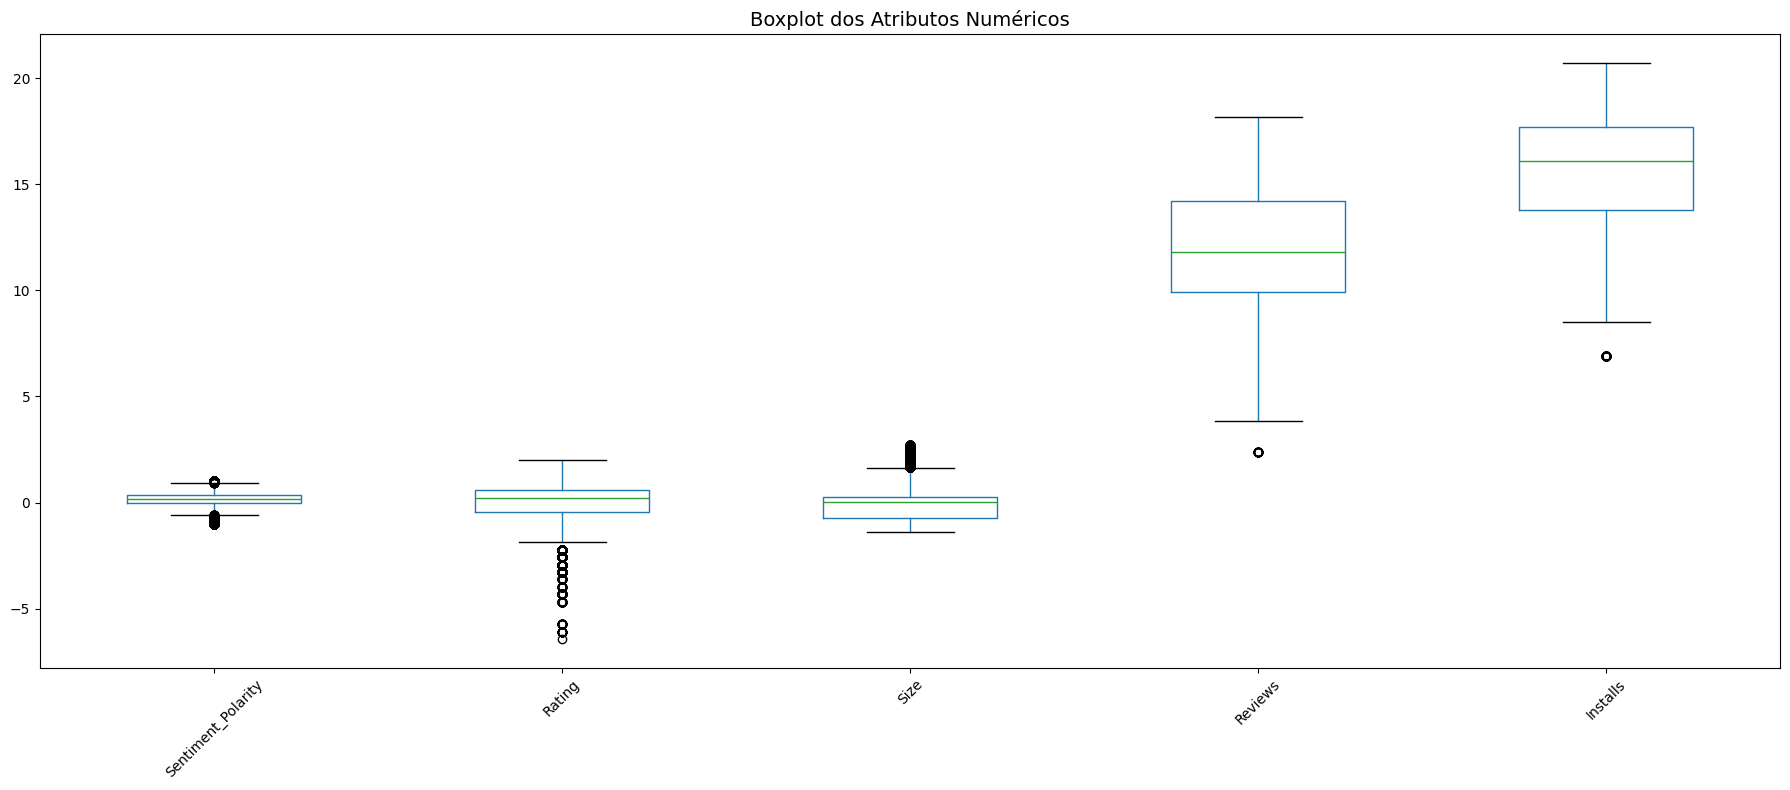

In [ ]:
# 1️⃣ Boxplot geral das colunas numéricas
# ================================
colunas_numericas = ['Sentiment_Polarity', 'Rating', 'Size', 'Reviews', 'Installs']

df.boxplot(column=colunas_numericas, figsize=(18,8), rot=45, grid=False)
plt.title("Boxplot dos Atributos Numéricos", fontsize=14)
plt.xticks(fontsize=10)
plt.tight_layout()
plt.show()

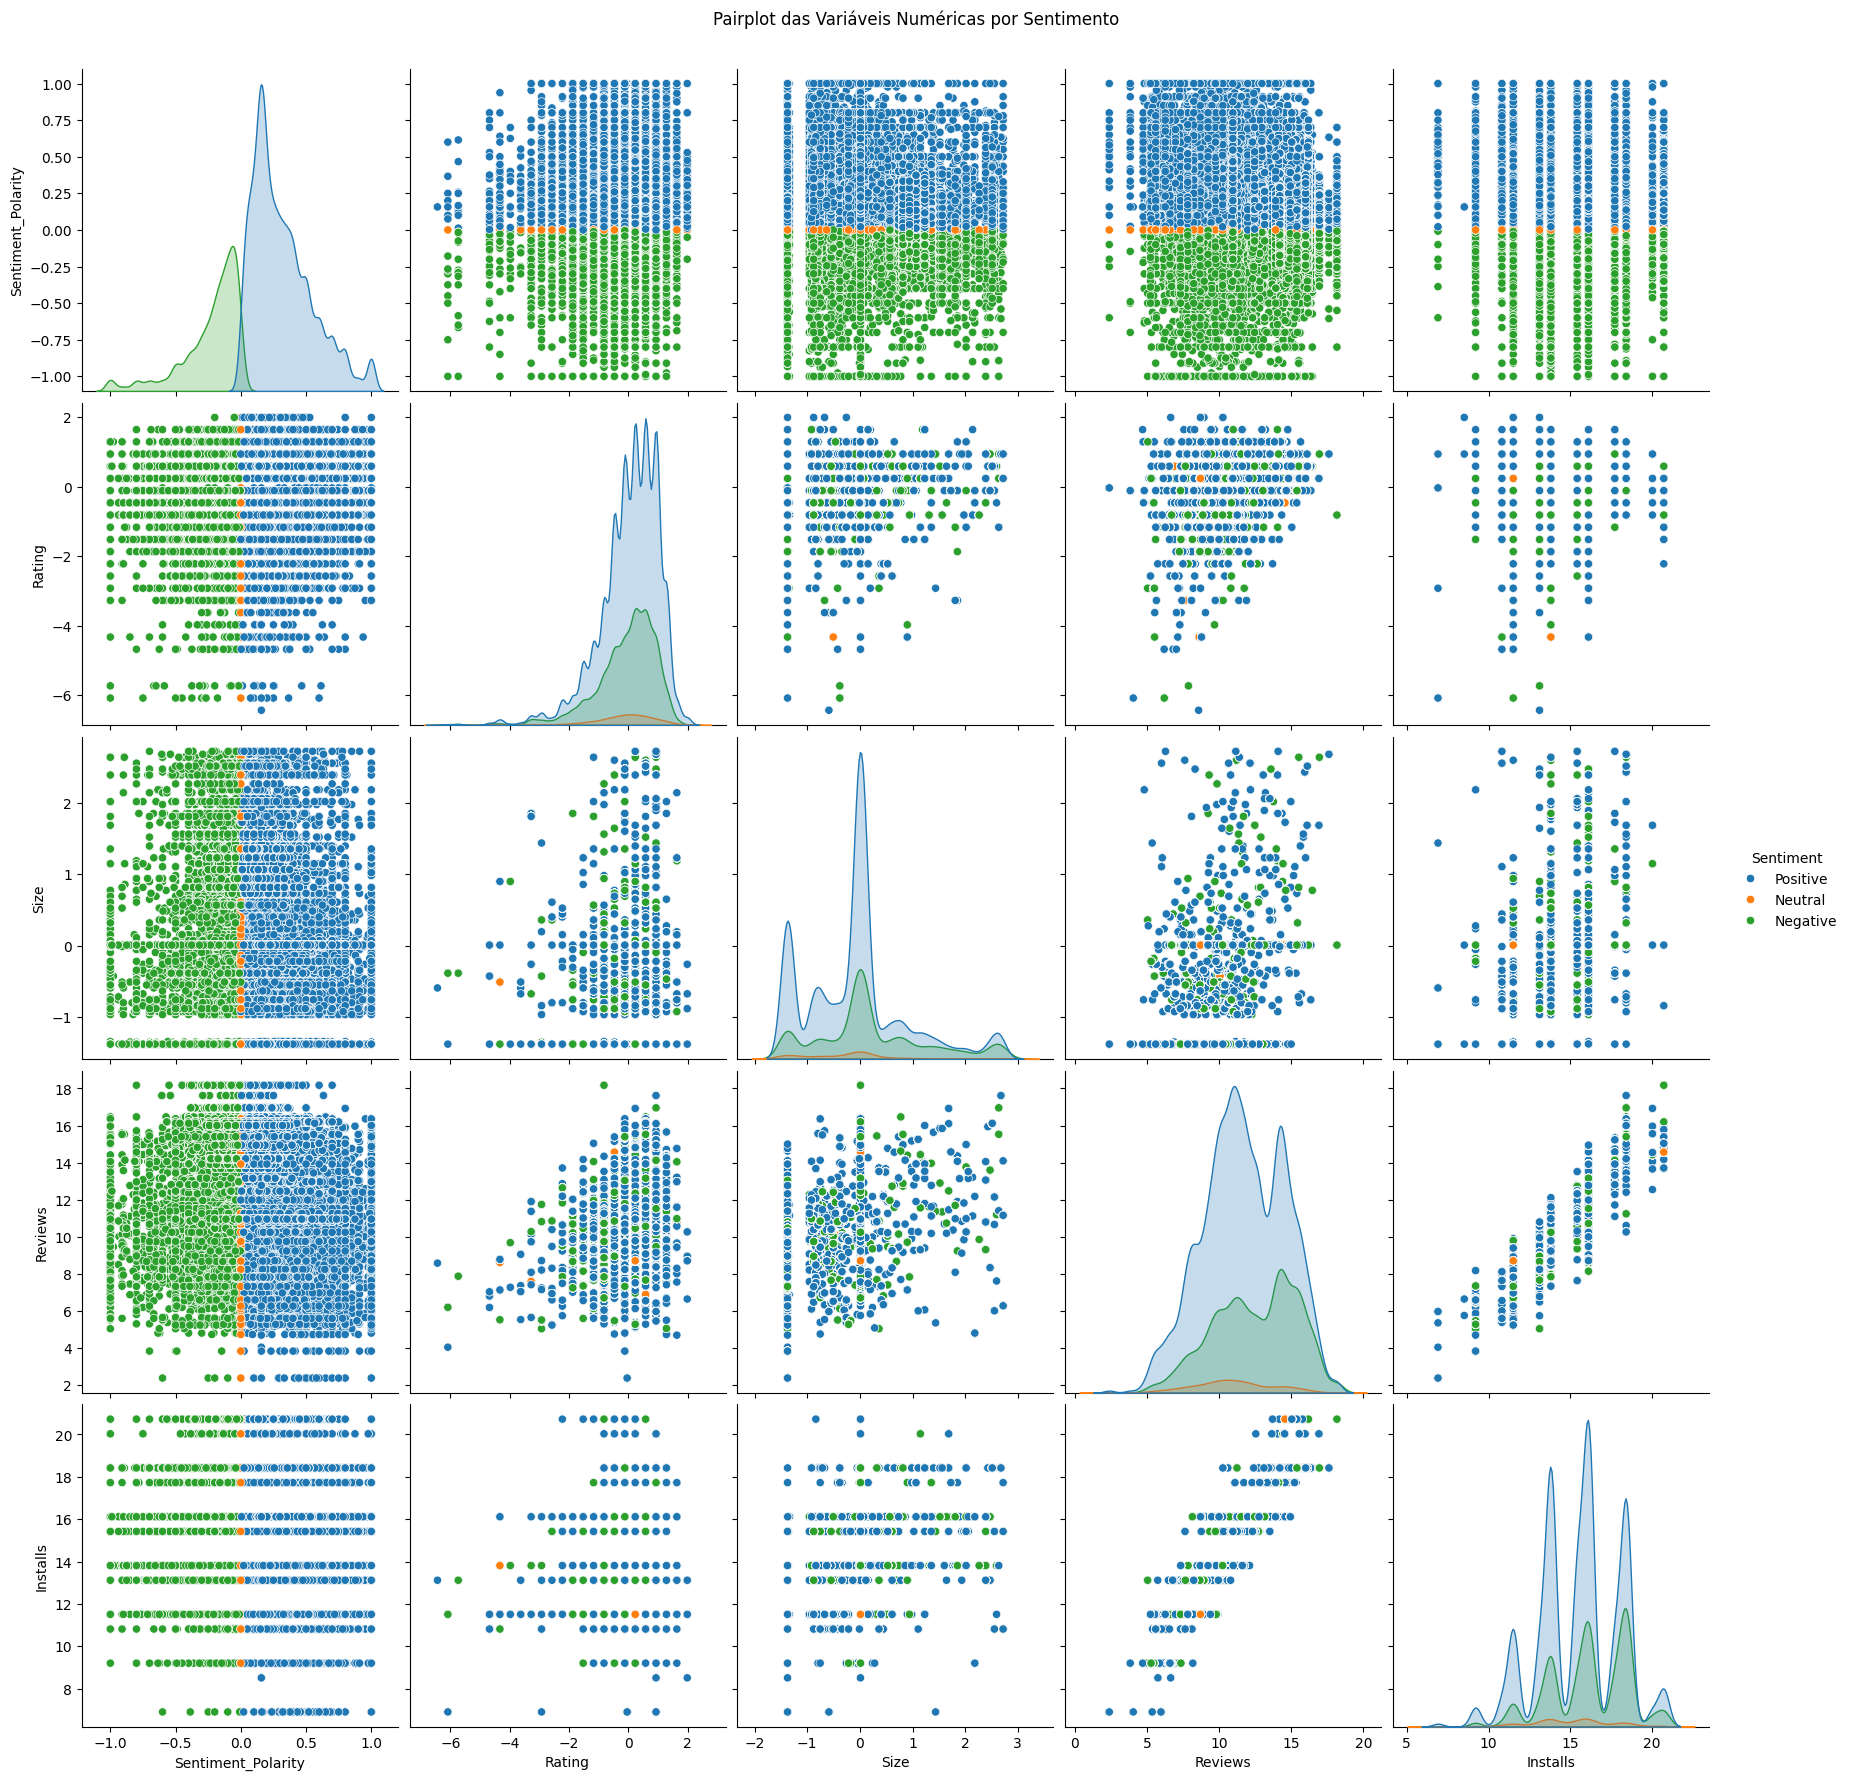

In [ ]:
# 2️⃣ Pairplot com base no Sentiment
# ================================
sns.pairplot(df, hue='Sentiment', vars=colunas_numericas, height=3.5)
plt.suptitle("Pairplot das Variáveis Numéricas por Sentimento", y=1.02)
plt.show()

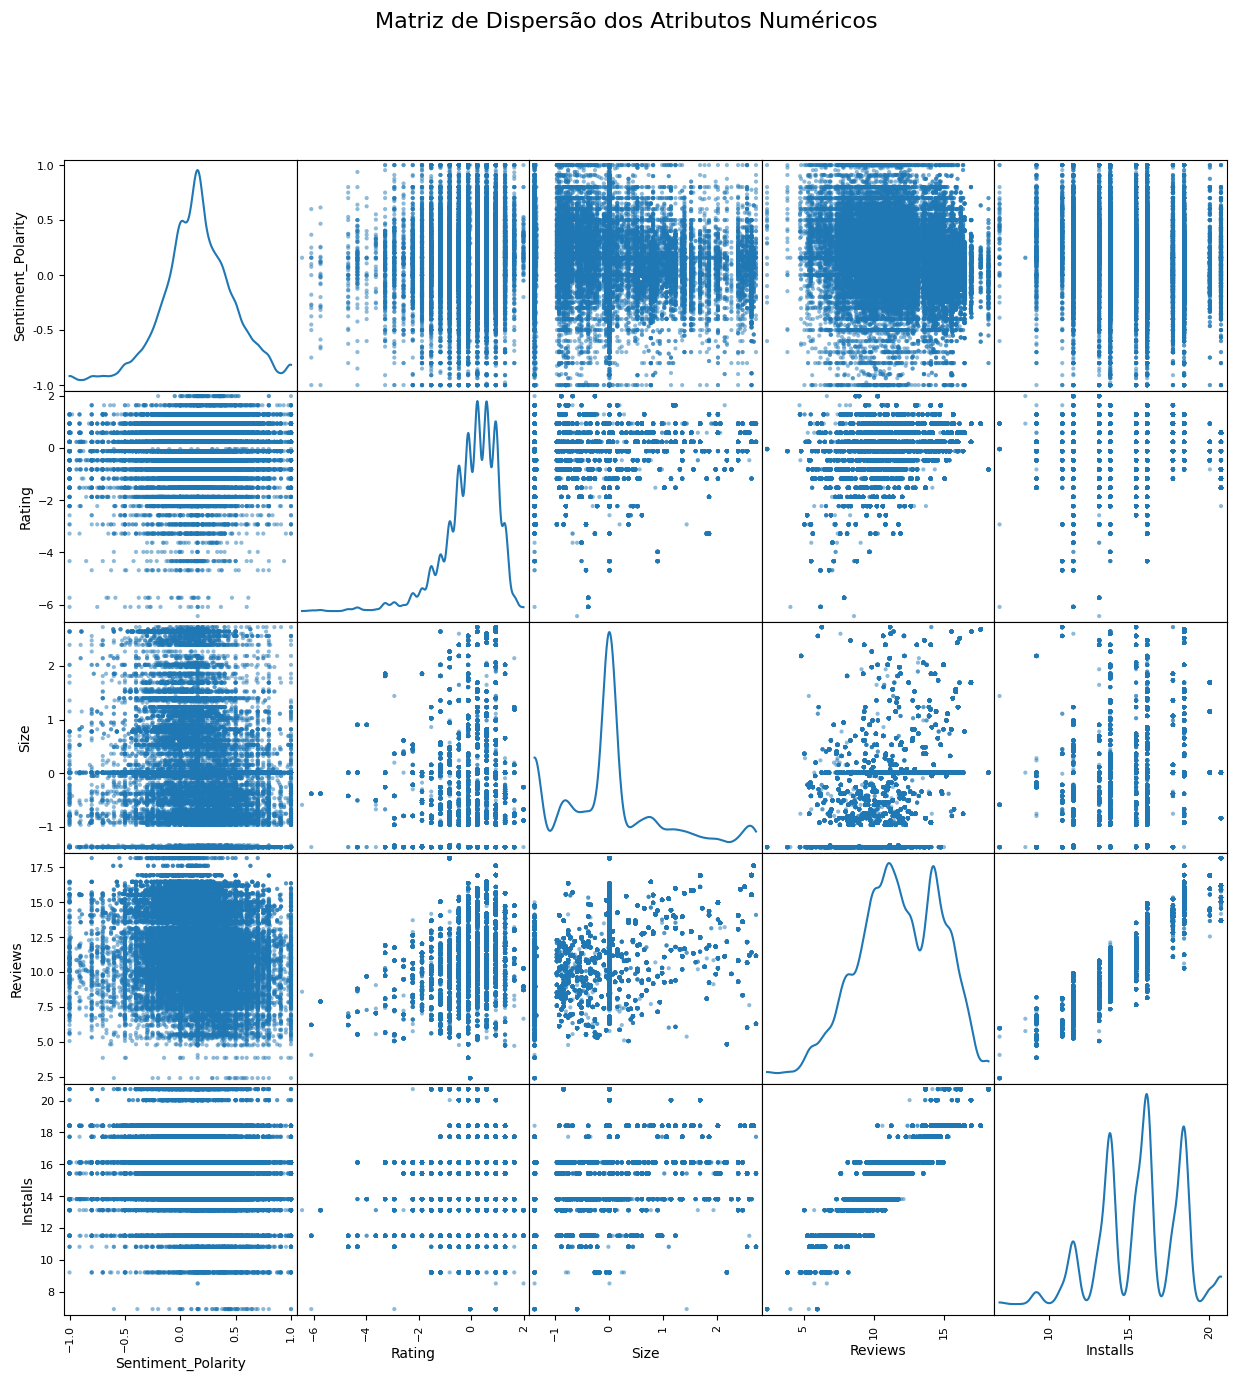

In [ ]:
# 3️⃣ Scatter matrix
# ================================
pd.plotting.scatter_matrix(df[colunas_numericas], figsize=(15,15), diagonal='kde')
plt.suptitle("Matriz de Dispersão dos Atributos Numéricos", fontsize=16)
plt.show()

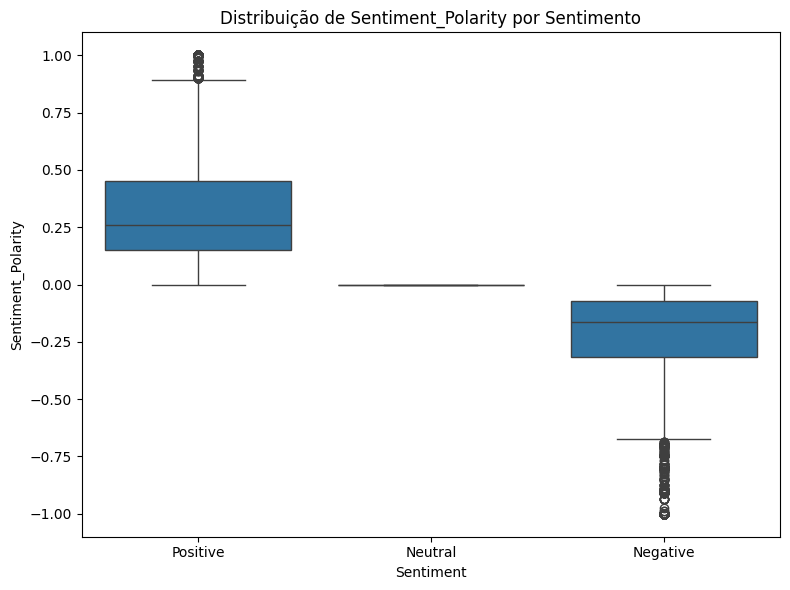

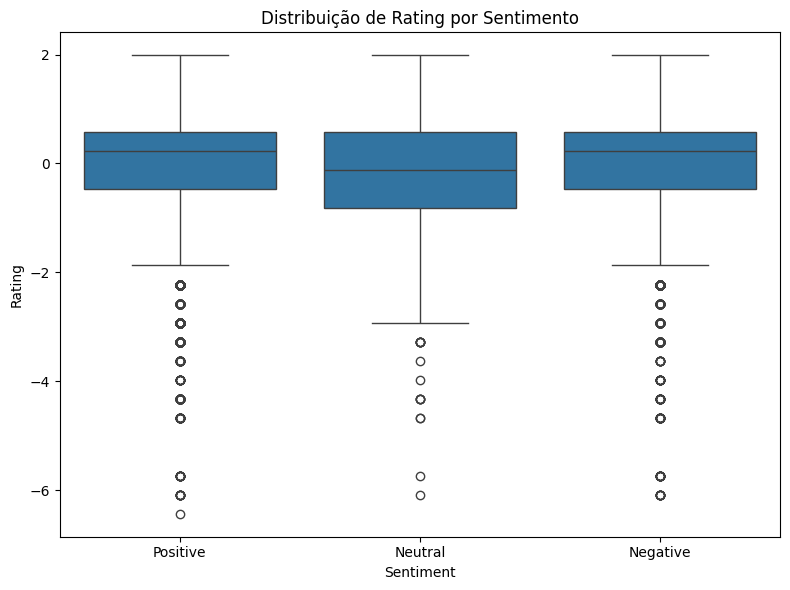

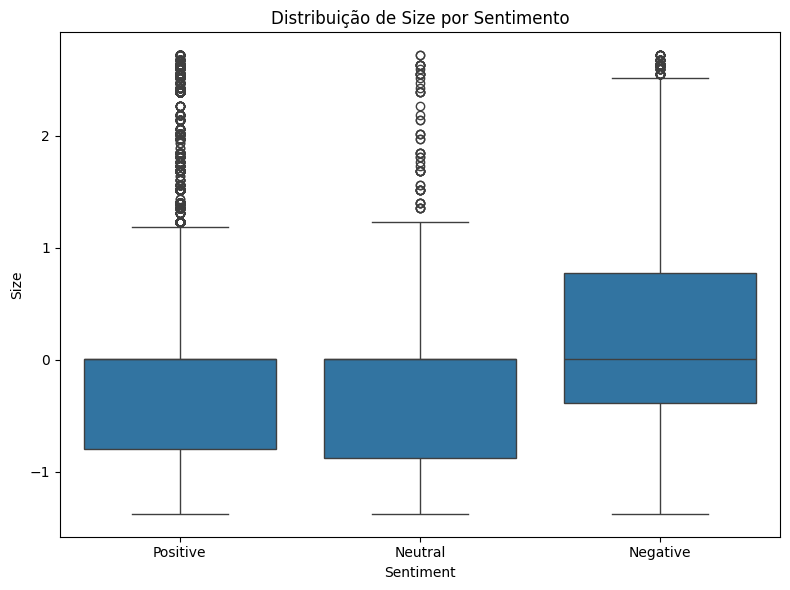

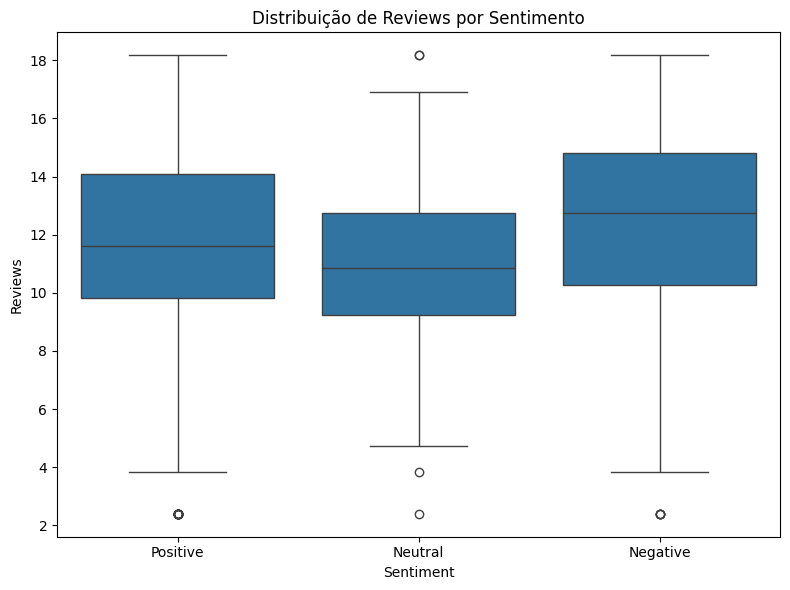

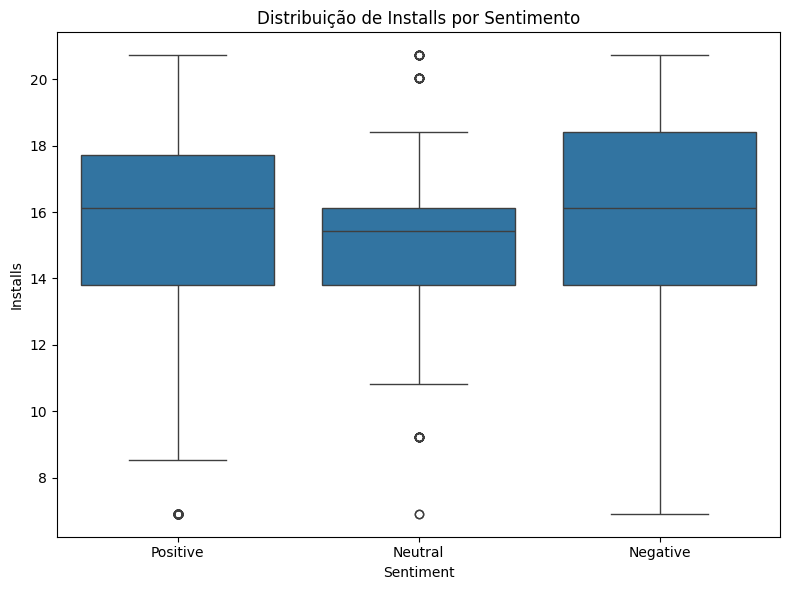

In [ ]:
# 4️⃣ Boxplots por Sentiment
# ================================
for atributo in colunas_numericas:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Sentiment', y=atributo, data=df, whis=1.5)
    plt.title(f'Distribuição de {atributo} por Sentimento')
    plt.tight_layout()
    plt.show()


Contagem de apps por Sentimento:
Sentiment
Positive    22977
Negative     8982
Neutral       903
Name: count, dtype: int64


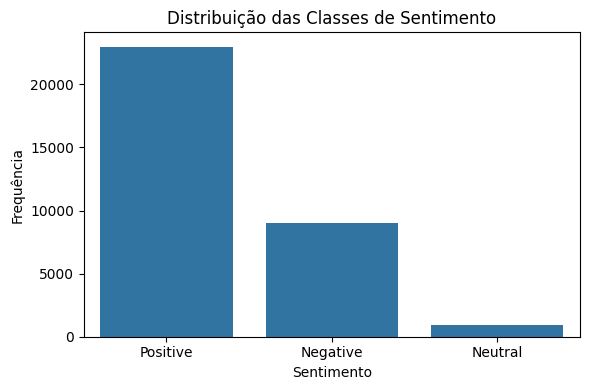

In [ ]:
# 5️⃣ Contagem das categorias de Sentiment
# ================================
print("Contagem de apps por Sentimento:")
print(df['Sentiment'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, order=df['Sentiment'].value_counts().index)
plt.title("Distribuição das Classes de Sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Frequência")
plt.tight_layout()
plt.show()


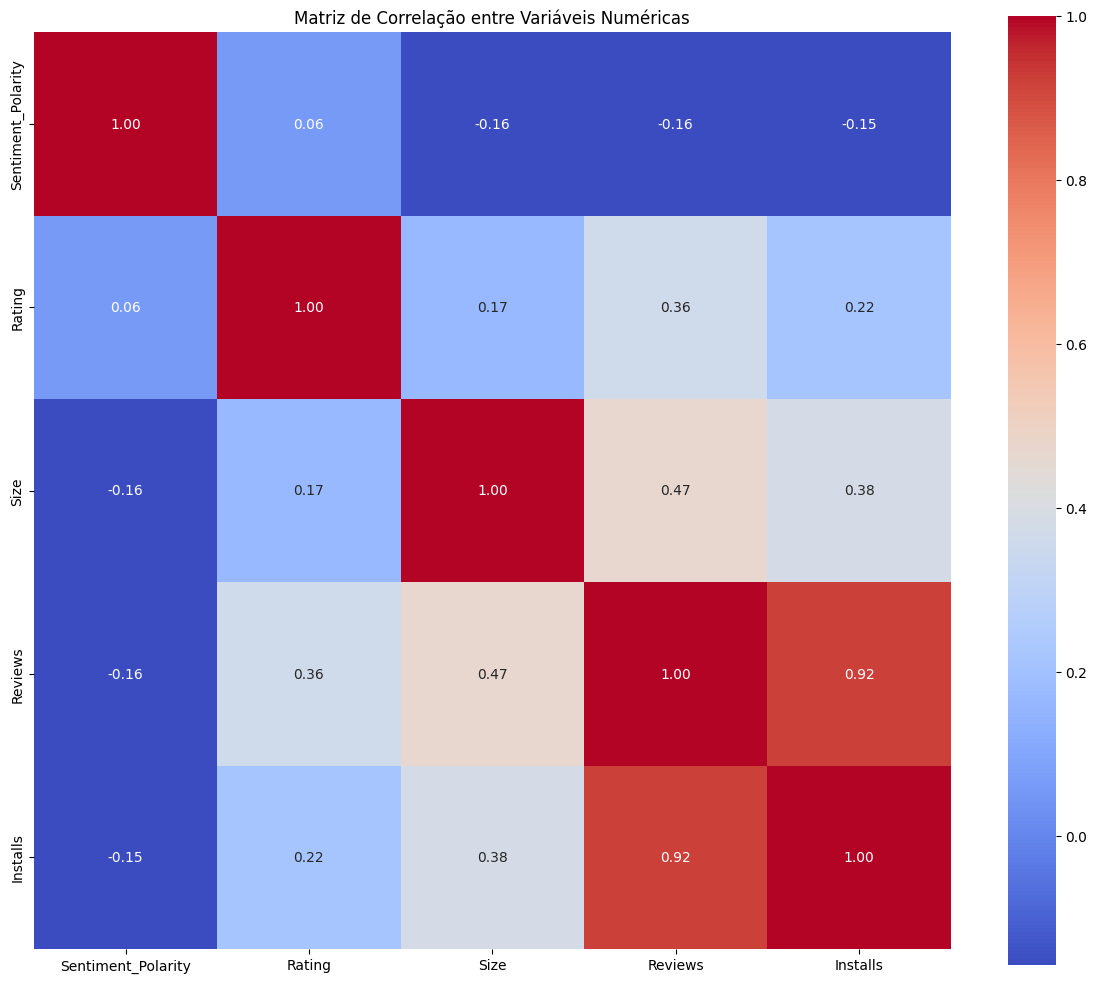

In [ ]:
# 6️⃣ Matriz de correlação entre numéricas
# ================================
corr_matrix = df[colunas_numericas].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlação entre Variáveis Numéricas')
plt.tight_layout()
plt.show()

/tmp/ipython-input-11693097.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top10_categories.index, x=top10_categories.values, palette='viridis')


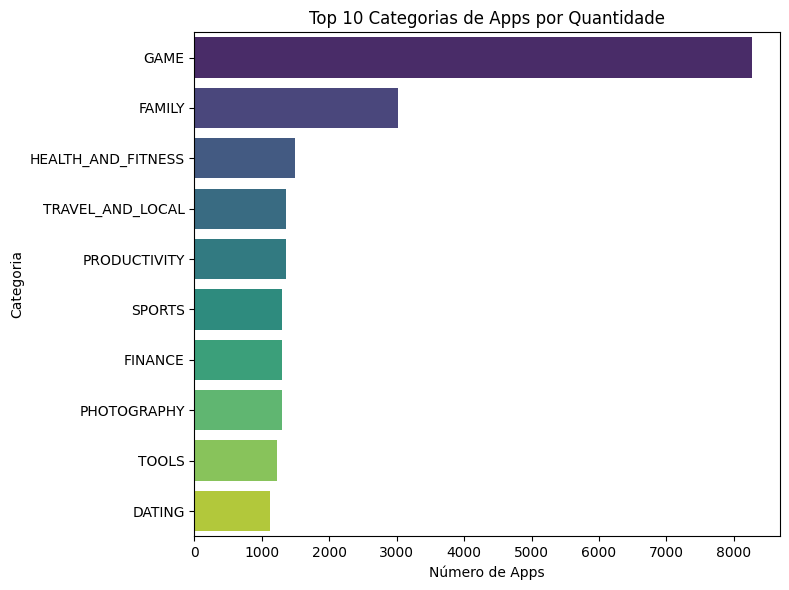

In [ ]:
# 7️⃣ Top 10 categorias mais populares
# ================================
top10_categories = df['Category'].value_counts().head(10)
plt.figure(figsize=(8,6))
sns.barplot(y=top10_categories.index, x=top10_categories.values, palette='viridis')
plt.title("Top 10 Categorias de Apps por Quantidade")
plt.xlabel("Número de Apps")
plt.ylabel("Categoria")
plt.tight_layout()
plt.show()



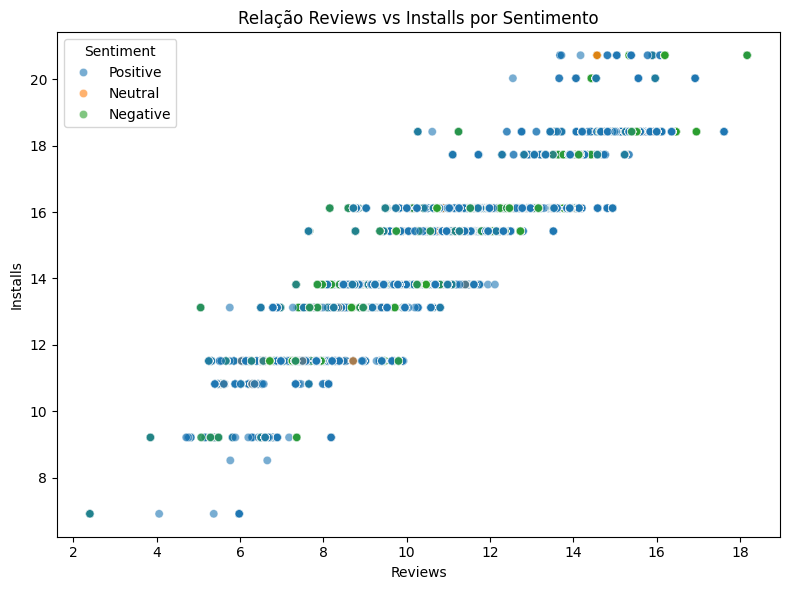

In [ ]:
# 8️⃣ Relação Reviews x Installs por Sentiment
# ================================
plt.figure(figsize=(8,6))
sns.scatterplot(x='Reviews', y='Installs', hue='Sentiment', data=df, alpha=0.6)
plt.title("Relação Reviews vs Installs por Sentimento")
plt.xlabel("Reviews")
plt.ylabel("Installs")
plt.tight_layout()
plt.show()